In [ ]:
!wget  https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip?dl=0

In [2]:
!unzip state-farm-distracted-driver-detection.zip?dl=0

Archive:  state-farm-distracted-driver-detection.zip?dl=0
  inflating: sample_submission.csv   
  inflating: driver_imgs_list.csv    
  inflating: imgs.zip                


In [ ]:
!unzip imgs.zip

In [4]:
import os
import pandas as pd
import numpy as np
from keras.models import Sequential,Model
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout

In [5]:
len(os.listdir('/content/test'))

79726

In [6]:
print(len(os.listdir('/content/train/c0')))
print(len(os.listdir('/content/train/c1')))
print(len(os.listdir('/content/train/c2')))
print(len(os.listdir('/content/train/c3')))
print(len(os.listdir('/content/train/c4')))
print(len(os.listdir('/content/train/c5')))
print(len(os.listdir('/content/train/c6')))
print(len(os.listdir('/content/train/c7')))
print(len(os.listdir('/content/train/c8')))
print(len(os.listdir('/content/train/c9')))

2489
2267
2317
2346
2326
2312
2325
2002
1911
2129


In [7]:
model=Sequential()
model.add(Conv2D(32,(5,5),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='sigmoid'))

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
%mkdir Test

In [12]:
!mv /content/test/ /content/Test

In [13]:
train_generator=train_datagen.flow_from_directory(
   '/content/train',
   target_size=(64,64),
   batch_size=32,
   class_mode='categorical',
   subset='training' 
)
validation_generator=train_datagen.flow_from_directory(
    '/content/train',
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
test_generator = test_datagen.flow_from_directory(
    '/content/Test' ,
    target_size=(64,64),
    batch_size=2,
    class_mode='categorical',
    shuffle=False
)

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.
Found 79726 images belonging to 1 classes.


In [14]:
type(test_generator)

keras.preprocessing.image.DirectoryIterator

In [17]:
STEPS_PER_EPOCHS=train_generator.n//train_generator.batch_size
VALIDATION_STEPS=validation_generator.n//train_generator.batch_size

In [19]:
model.fit(train_generator,
          steps_per_epoch= STEPS_PER_EPOCHS,
          epochs=10,
          validation_steps=VALIDATION_STEPS
          )

Epoch 1/10
560/560 [==============================] - 379s 674ms/step - loss: 1.2824 - accuracy: 0.5372
Epoch 2/10
560/560 [==============================] - 365s 651ms/step - loss: 0.3943 - accuracy: 0.8760
Epoch 3/10
560/560 [==============================] - 368s 656ms/step - loss: 0.2293 - accuracy: 0.9283
Epoch 4/10
560/560 [==============================] - 361s 644ms/step - loss: 0.1767 - accuracy: 0.9461
Epoch 5/10
560/560 [==============================] - 368s 657ms/step - loss: 0.1396 - accuracy: 0.9566
Epoch 6/10
560/560 [==============================] - 352s 629ms/step - loss: 0.1253 - accuracy: 0.9615
Epoch 7/10
560/560 [==============================] - 359s 641ms/step - loss: 0.1066 - accuracy: 0.9675
Epoch 8/10
560/560 [==============================] - 362s 646ms/step - loss: 0.0975 - accuracy: 0.9704
Epoch 9/10
560/560 [==============================] - 370s 660ms/step - loss: 0.0896 - accuracy: 0.9721
Epoch 10/10
560/560 [==============================] - 429s 767m

In [21]:
from tensorflow.keras.layers import Conv2D,Dense,Dropout,MaxPooling2D,Flatten,Activation,BatchNormalization

In [24]:
mod=Sequential()
mod.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=(64,64,3)))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.3))
mod.add(Conv2D(64,kernel_size=(2,2),activation='relu',padding='same'))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.3))
mod.add(Conv2D(128,kernel_size=(5,5),activation='relu',padding='same'))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.5))
mod.add(Flatten())
mod.add(Dense(512,activation='relu'))
mod.add(BatchNormalization())
mod.add(Dropout(0.5))
mod.add(Dense(128,activation='relu'))
mod.add(Dropout(0.25))
mod.add(Dense(10,activation='softmax'))

In [25]:
mod.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Validate

In [26]:
STEPS_PER_EPOCH= train_generator.n// train_generator.batch_size
VALIDATION_STEP= validation_generator.n//train_generator.batch_size

In [30]:
model2=mod.fit(train_generator,
               steps_per_epoch=STEPS_PER_EPOCH,
               epochs=5,
               validation_data=validation_generator,
               validation_steps=VALIDATION_STEP)

Epoch 1/5
560/560 [==============================] - 556s 993ms/step - loss: 0.4377 - accuracy: 0.8549 - val_loss: 0.3763 - val_accuracy: 0.8699
Epoch 2/5
560/560 [==============================] - 507s 905ms/step - loss: 0.4056 - accuracy: 0.8662 - val_loss: 0.2734 - val_accuracy: 0.9136
Epoch 3/5
560/560 [==============================] - 486s 868ms/step - loss: 0.3818 - accuracy: 0.8720 - val_loss: 0.2688 - val_accuracy: 0.9176
Epoch 4/5
560/560 [==============================] - 451s 806ms/step - loss: 0.3582 - accuracy: 0.8810 - val_loss: 0.1743 - val_accuracy: 0.9413
Epoch 5/5
560/560 [==============================] - 417s 744ms/step - loss: 0.3228 - accuracy: 0.8939 - val_loss: 0.1580 - val_accuracy: 0.9462


In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

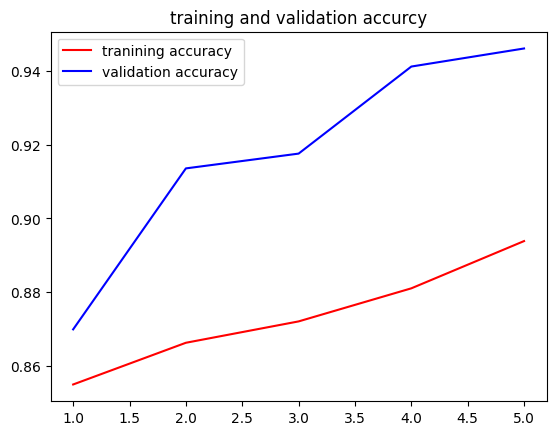

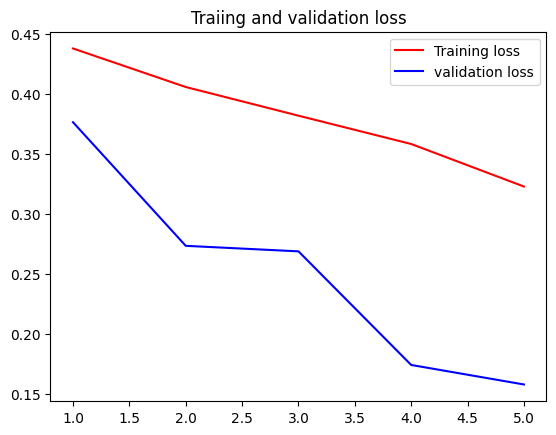

In [33]:
acc=model2.history['accuracy']
val_acc=model2.history['val_accuracy']
loss=model2.history['loss']
val_loss=model2.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'r',label='tranining accuracy')
plt.plot(epochs,val_acc,'b',label='validation accuracy')
plt.title('training and validation accurcy')
plt.legend()
plt.figure()

#plotting the loss

plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('Traiing and validation loss')
plt.legend()
plt.show()

In [34]:
STEP_SIZE_TEST= test_generator.n//test_generator.batch_size
test_generator.reset()
pred=mod.predict_generator(test_generator,steps=STEP_SIZE_TEST,verbose=1)

<ipython-input-34-cd60d84bc88c>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=mod.predict_generator(test_generator,steps=STEP_SIZE_TEST,verbose=1)


39863/39863 [==============================] - 911s 23ms/step


In [35]:
pred

array([[9.2280629e-08, 3.7294451e-10, 3.3430528e-10, ..., 1.0214369e-09,
        1.2768003e-08, 8.6349310e-09],
       [3.9509494e-05, 3.6513570e-06, 1.1552816e-04, ..., 6.7794681e-05,
        3.4992909e-04, 3.4175030e-04],
       [2.3955463e-01, 5.7747120e-01, 5.0513544e-03, ..., 1.9977579e-02,
        3.2803572e-03, 3.4577728e-03],
       ...,
       [2.7141089e-03, 6.3172658e-04, 1.6765798e-02, ..., 1.5963799e-01,
        1.2845415e-01, 4.2180665e-02],
       [9.5094226e-09, 1.7563943e-07, 5.7314259e-01, ..., 6.2516738e-06,
        4.2097205e-03, 7.7691148e-08],
       [1.4359177e-09, 1.4080706e-11, 4.5625168e-10, ..., 1.6313893e-10,
        1.2150438e-08, 6.8760904e-09]], dtype=float32)

In [36]:
len(pred)

79726

In [37]:
label_test=pd.DataFrame(pred)

In [38]:
label_test

,0,1,2,3,4,5,6,7,8,9
0,9.228063e-08,3.729445e-10,3.343053e-10,4.557055e-07,4.699829e-09,9.999994e-01,5.963048e-10,1.021437e-09,1.276800e-08,8.634931e-09
1,3.950949e-05,3.651357e-06,1.155282e-04,3.801573e-05,1.041196e-04,9.978821e-01,1.057521e-03,6.779468e-05,3.499291e-04,3.417503e-04
2,2.395546e-01,5.774712e-01,5.051354e-03,1.448591e-01,3.928897e-03,7.488049e-05,2.344163e-03,1.997758e-02,3.280357e-03,3.457773e-03
3,2.441454e-02,7.013447e-02,2.210357e-02,5.774905e-03,1.042220e-02,2.400503e-02,1.967913e-01,2.473855e-02,5.343477e-01,8.726782e-02
4,1.482907e-04,4.363895e-09,8.735238e-09,9.928691e-01,6.943973e-03,1.275846e-05,3.968282e-07,4.996914e-10,2.535214e-05,7.166991e-08
...,...,...,...,...,...,...,...,...,...,...
79721,1.392439e-03,7.898849e-01,4.518250e-03,2.624607e-05,6.658742e-06,5.474327e-02,2.677319e-03,1.294346e-01,1.580592e-02,1.510424e-03
79722,2.909330e-03,9.769668e-01,6.106063e-04,1.840645e-02,9.927468e-06,1.953570e-05,7.033718e-04,3.250641e-06,1.049655e-04,2.656996e-04
79723,2.714109e-03,6.317266e-04,1.676580e-02,5.127796e-03,6.281042e-01,4.865540e-04,1.589698e-02,1.596380e-01,1.284541e-01,4.218066e-02
79724,9.509423e-09,1.756394e-07,5.731426e-01,3.233843e-10,5.015582e-08,8.031676e-09,4.226411e-01,6.251674e-06,4.209721e-03,7.769115e-08


In [39]:
label_test.to_csv('Distracted_Driver_MultiAction_Classification.csv',index=False)